### People's Friendship University in Russia

#### Faculty of Science 
#### Department of Mathematical Modeling and Artificial Intelligence 

## Labratory work №6 report


### Meathods of machine learning

##### Student:  Abu Suveilim Mukhammed M.
##### Group:   NKNbd-01-21

## Moscow 2024
### Version №15

Option 15 

1. Dataset oxford_iiit_pet with resolution changed to 60x96 

2. Classes labeled 11,21,31,32,33 

3. Requirements for MLP network architecture: 

Serial API with add() method on creation 

Loss Function: Categorical Cross Entropy 

Number of hidden layers 6 

The number of neurons is 30 in the first hidden layer, increasing by 15 with each subsequent hidden layer 

Using layers with L1L2 regularization 

4. CNN network architecture requirements: 

Functional API when created 

Loss Function: Sparse Categorical Cross-Entropy 

Number of convolutional layers 2 

Number of filters in convolutional layers 32 

Filter dimensions 3x3 

Using Batch Normalization Layers 

5. Requirements for RNN network architecture: 

Sequential API with list of layers on creation 

Loss Function: Categorical Cross Entropy 

LSTM layer with 96 neurons 

Using dropout layers 

6. Quality indicator of multi-class classification: 

minimum class accuracy, where the accuracy of a class is equal to the proportion of correct predictions for all points assigned by the classifier to this class.

## 1. Load the data set with images specified in the individual task from Tensorflow Datasets, divided into training, validation and test samples. If during further work with the data there is a lack of computing resources, the image resolution can be reduced.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image, ImageOps
from math import sqrt
tf.__version__

'2.16.1'

In [2]:
# loading oxford_iiit_pet dataset
ds, info = tfds.load("oxford_iiit_pet", split=['train', 'test'], with_info=True)
print(ds)
print(info)

[<_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>, <_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>]
tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scal

In [3]:
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
# Validation set (20% of df_train)
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=42)
print("training set:", df_train.shape, "validation set:", df_val.shape, "testing set:", df_test.shape)

training set: (2944, 5) validation set: (736, 5) testing set: (3669, 5)


In [4]:
image = Image.fromarray(df_train.iloc[0]['image'])
img = Image.fromarray(df_train.iloc[0]['image'])
image= image.resize((60,96))

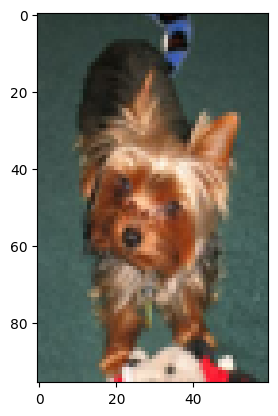

In [5]:
plt.imshow(image)

In [6]:
import random

def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)

    num_row = 2
    num_col = 5

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = imgs[i]
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

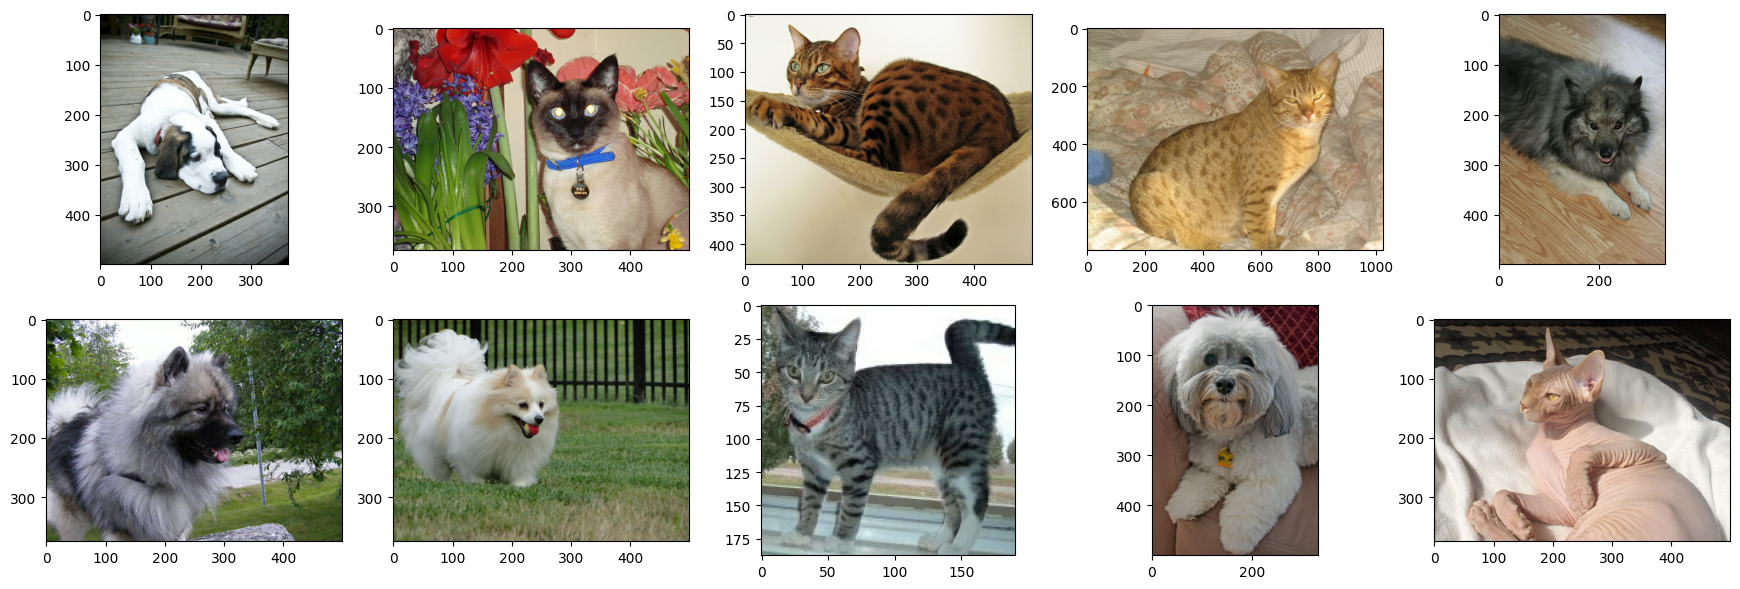

In [7]:
plot_random_sample(df_train['image'])

In [8]:
np.array(img).shape

(300, 225, 3)

In [9]:
# Function to resize images in a DataFrame
def resize_images(df, new_size=(60, 96)):
    resized_images = []
    for i in range(df.shape[0]):
        image = Image.fromarray(df.iloc[i]['image'])
        image = image.resize(new_size)
        resized_images.append(np.array(image))
    df['image'] = resized_images
    return df

# Resize images in train and test DataFrames
df_train = resize_images(df_train)
df_test = resize_images(df_test)
df_val = resize_images(df_val)

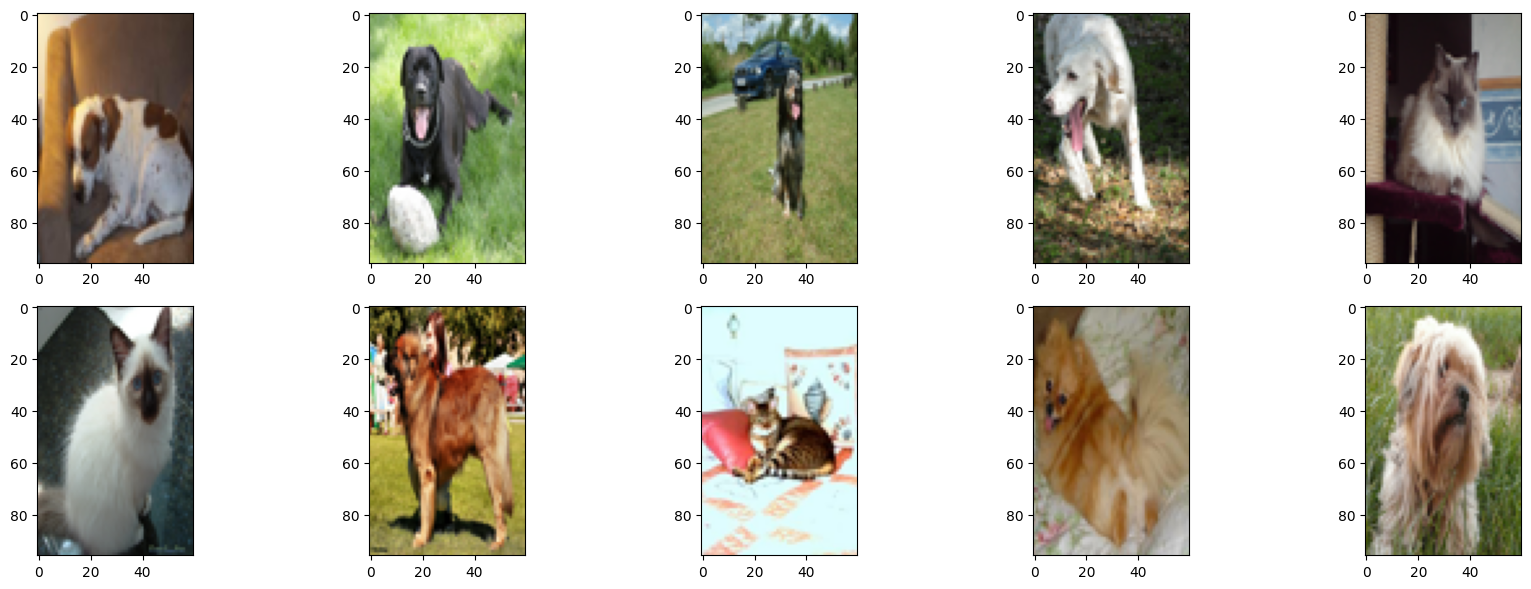

In [10]:
plot_random_sample(df_train['image'])

We can see that we changed the resolution to 60 by 96

In [11]:
df_train.info

<bound method DataFrame.info of                                   file_name  \
2618           b'yorkshire_terrier_147.jpg'   
2964                b'newfoundland_148.jpg'   
929             b'american_bulldog_100.jpg'   
1837  b'staffordshire_bull_terrier_167.jpg'   
1511                     b'Siamese_143.jpg'   
...                                     ...   
1130                     b'Ragdoll_193.jpg'   
1294                   b'chihuahua_178.jpg'   
860               b'great_pyrenees_141.jpg'   
3507                   b'shiba_inu_141.jpg'   
3174                         b'pug_167.jpg'   

                                                  image  label  \
2618  [[[45, 60, 55], [48, 63, 58], [48, 63, 58], [4...     36   
2964  [[[64, 36, 21], [53, 27, 14], [133, 110, 86], ...     22   
929   [[[29, 38, 30], [29, 44, 45], [27, 41, 44], [3...      1   
1837  [[[255, 255, 255], [255, 255, 255], [248, 249,...     34   
1511  [[[192, 204, 214], [199, 211, 224], [233, 239,...     32   
...    

In [12]:
# Inspect unique label values in train, test and val DataFrames
print(df_train['label'].unique())
print(df_test['label'].unique())
print(df_val['label'].unique())

[36 22  1 34 32  4 25  9 14 19  5 16 12 11 30  6 10 33  2 29  8  7 23 17
 27 28 20 18 13 24 35 26 15 31 21  0  3]
[19 20 28  4 18 22 36 16  3 29 15 10 31  2  6  8  1 30 23 24 13 25 32 33
  7 21 17  9 34 12 14 26 27 11 35  0  5]
[14 29 35 16  1 18 33 13 22 32 27  5  4 36 26  6  8 20 11 23 28 30  9 34
 24 10  7  0  3 25 15  2 12 31 17 21 19]


## 2. Keep the images specified in the individual assignment in the set and render several images.

In [13]:
# Filter and relabel DataFrames
def filter_and_relabel(df):
    x0 = df[df['label'] == 11]
    x0['label'] = 0
    x1 = df[df['label'] == 21]
    x1['label'] = 1
    x2 = df[df['label'] == 31]
    x2['label'] = 2
    x3 = df[df['label'] == 32]
    x3['label'] = 3
    x4 = df[df['label'] == 33]
    x4['label'] = 4
    return pd.concat([x0, x1, x2, x3, x4])

df_train_01 = filter_and_relabel(df_train)
df_val_01 = filter_and_relabel(df_val)
df_test_01 = filter_and_relabel(df_test)

print(df_train_01['label'].value_counts())
print(df_val_01['label'].value_counts())
print(df_test_01['label'].value_counts())

label
4    91
3    79
1    76
2    75
0    72
Name: count, dtype: int64
label
2    25
1    24
0    21
3    20
4     9
Name: count, dtype: int64
label
1    100
2    100
3    100
4    100
0     97
Name: count, dtype: int64


C:\Users\Mo\AppData\Local\Temp\ipykernel_18360\2111785736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x0['label'] = 0
C:\Users\Mo\AppData\Local\Temp\ipykernel_18360\2111785736.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['label'] = 1
C:\Users\Mo\AppData\Local\Temp\ipykernel_18360\2111785736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

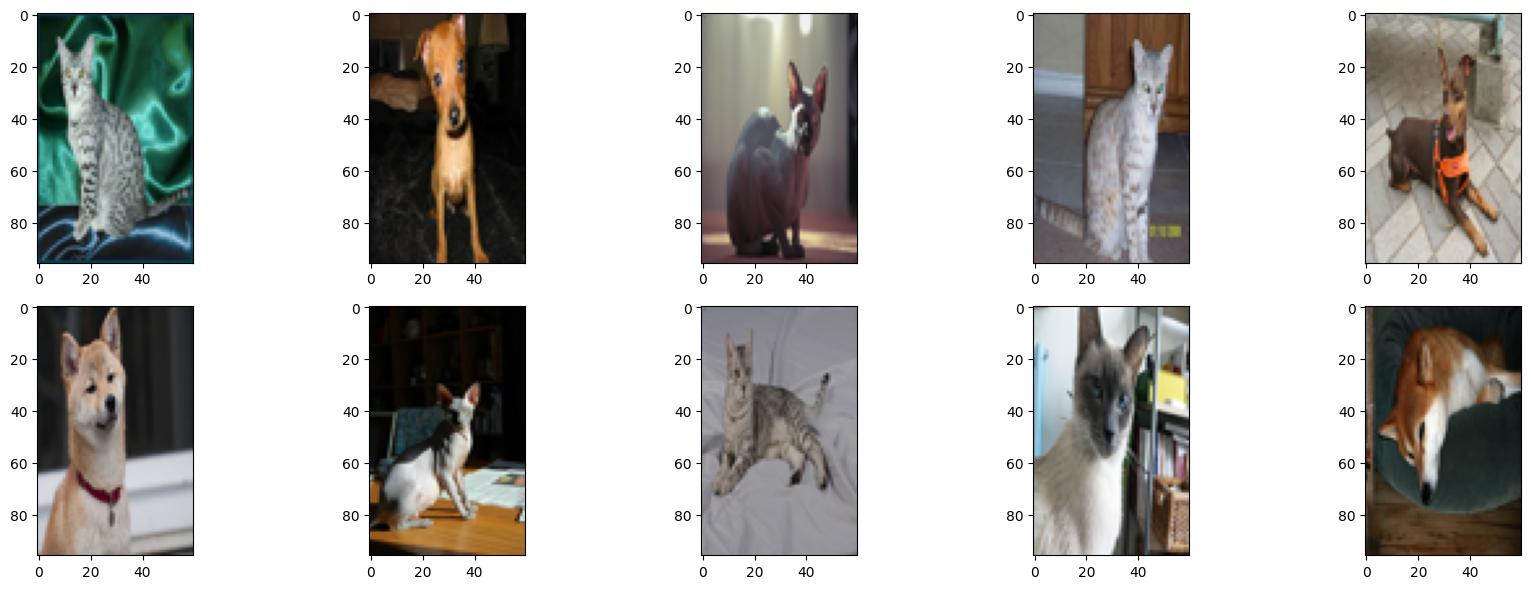

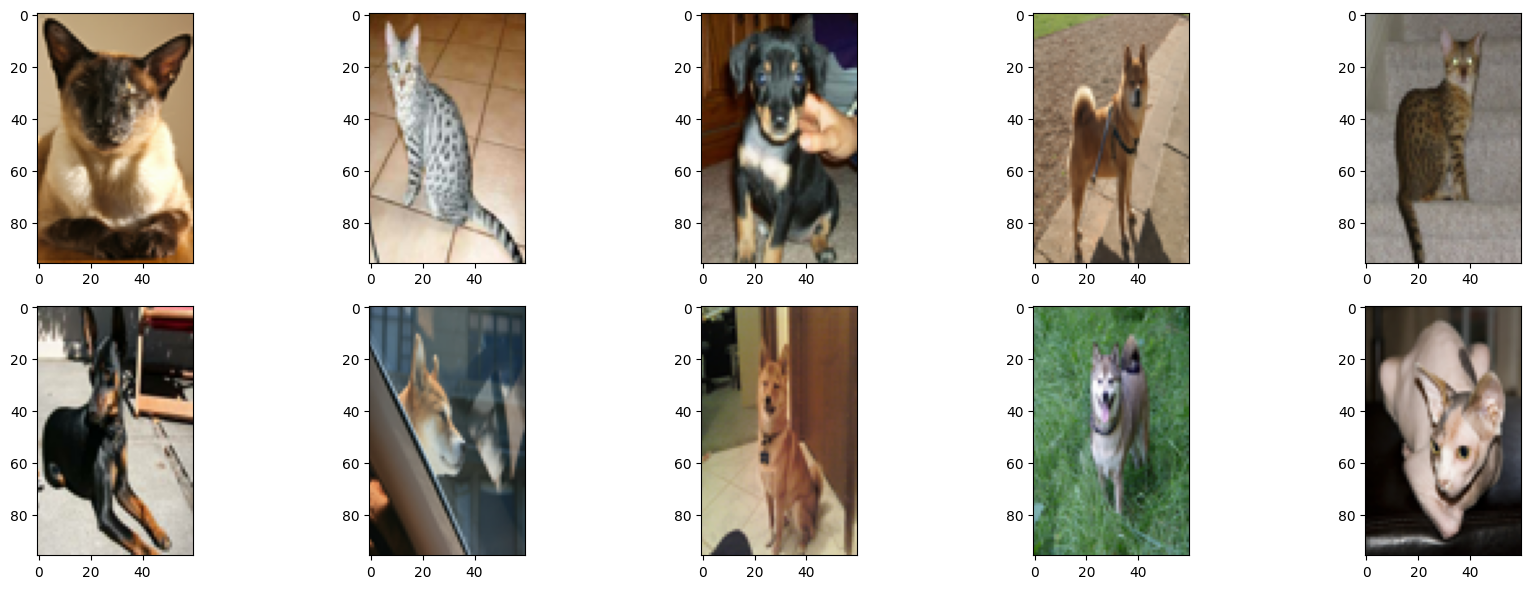

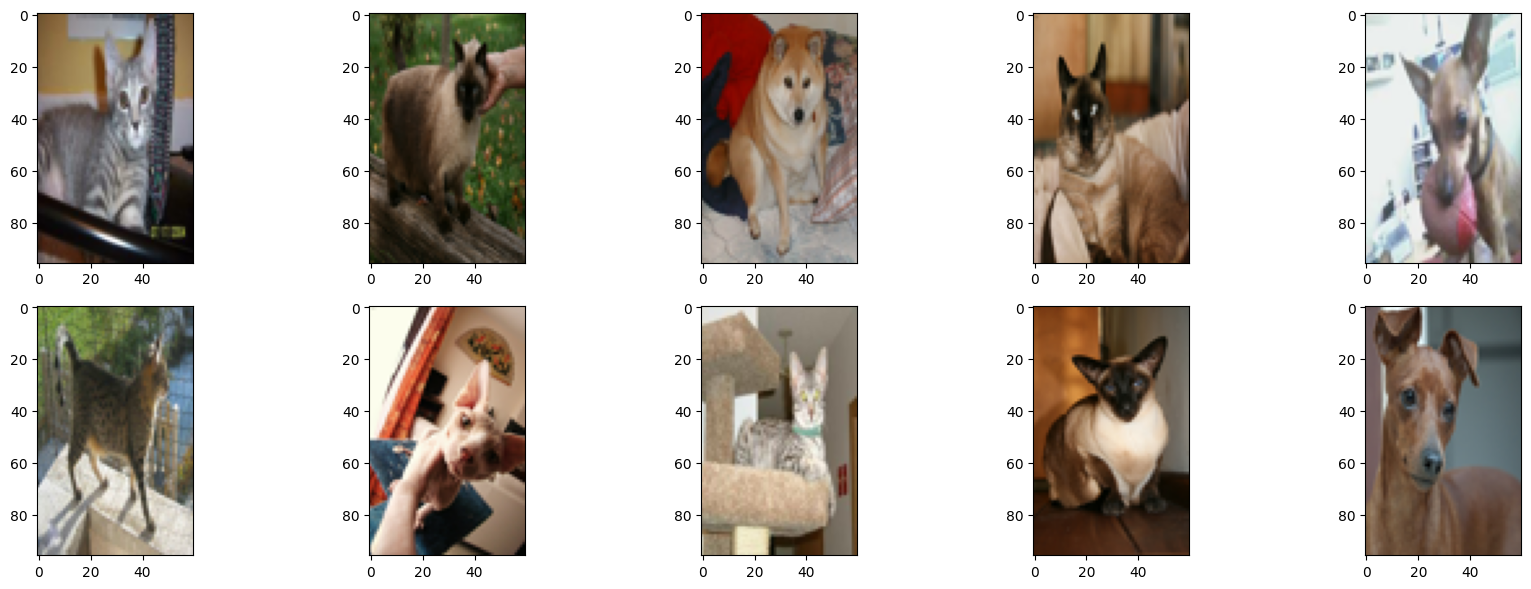

In [14]:
#let's check if we have correctly chose the lable
plot_random_sample(df_train_01['image'])
plot_random_sample(df_val_01['image'])
plot_random_sample(df_test_01['image'])

## 3. Build MLP, CNN and RNN neural networks for the task of multi-class image classification (network architecture requirements are specified in the individual task), using the loss function specified in the individual task. Select parameters such as activation functions, optimizer, initial learning rate, mini-batch size, etc. yourself, ensuring the training of neural networks. Train neural networks using the validation set generated in step 1. Stop training neural networks if losses on the validation set increase over several training epochs in a row. For each neural network, print the number of training epochs required.

### MLP network

In [15]:
train_labels_01 = df_train_01['label'].to_numpy(dtype=np.float32)
val_labels_01 = df_val_01['label'].to_numpy(dtype=np.float32)
test_labels_01 = df_test_01['label'].to_numpy(dtype=np.float32)
train_labels_01.shape, val_labels_01.shape, test_labels_01.shape

((393,), (99,), (497,))

In [16]:
label_train_01 = list(df_train_01['label'])
label_val_01 = list(df_val_01['label'])
label_test_01 = list(df_test_01['label'])

In [17]:
def to_one_hot(labels, dimension=5):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [18]:
train_labels_01 = to_one_hot(label_train_01)
val_labels_01 = to_one_hot(label_val_01)
test_labels_01 = to_one_hot(label_test_01)
train_labels_01.shape, val_labels_01.shape, test_labels_01.shape

((393, 5), (99, 5), (497, 5))

In [19]:
train_images_01 = np.zeros(shape=(df_train_01.shape[0],96,60,3), dtype=np.float32)
val_images_01 = np.zeros(shape=(df_val_01.shape[0],96,60,3), dtype=np.float32)
test_images_01 = np.zeros(shape=(df_test_01.shape[0],96,60,3), dtype=np.float32)

In [20]:
for idx in range(train_labels_01.shape[0]):
    train_images_01[idx,:,:,:] = \
    np.array(Image.fromarray(df_train_01.iloc[idx]['image']))
for idx in range(test_labels_01.shape[0]):
    test_images_01[idx,:,:,:] = \
    np.array(Image.fromarray(df_test_01.iloc[idx]['image']))

In [21]:
train_images_01 /= 255
val_images_01 /= 255
test_images_01 /= 255
print(train_images_01.shape, val_images_01.shape, test_images_01.shape, train_labels_01.shape, val_labels_01.shape, test_labels_01.shape)

(393, 96, 60, 3) (99, 96, 60, 3) (497, 96, 60, 3) (393, 5) (99, 5) (497, 5)


Since we'll have 3 models I think it is better to make a function that creates each model
So let's create a function for MLP networks with these parameters
MLP network architecture requirements: 

Serial API with add() method on creation 

Loss Function: Categorical Cross Entropy 

Number of hidden layers 6 

The number of neurons is 30 in the first hidden layer, increasing by 15 with each subsequent hidden layer 

Using layers with L1L2 regularization

In [22]:
from tensorflow.keras import layers, regularizers, models

In [23]:
def create_mlp_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(30, activation='swish', kernel_regularizer=regularizers.l1_l2(0.01)))
    #model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(45, activation='swish', kernel_regularizer=regularizers.l1_l2(0.01)))
    #model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(60, activation='swish', kernel_regularizer=regularizers.l1_l2(0.01)))
    #model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(75, activation='swish', kernel_regularizer=regularizers.l1_l2(0.01)))
    #model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(90, activation='swish', kernel_regularizer=regularizers.l1_l2(0.01)))
    #model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(105, activation='swish', kernel_regularizer=regularizers.l1_l2(0.01)))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (96, 60, 3)
num_classes = 5

In [24]:
model_01 = create_mlp_model(input_shape, num_classes)
model_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_01.summary()

C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 17280)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │         518,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 45)                  │           1,395 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 60)                  │           2,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 75)                  │           4,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 90)                  │           6,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 105)                 │           9,555 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │             530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 544,085 (2.08 MB)

 Trainable params: 544,085 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10, #After 10 epochs with no improvement  training will be stopped
    verbose=1, #displays messages when the callback takes an action
    mode="auto",
    baseline=None,
    restore_best_weights=True, #restore best weights
    start_from_epoch=10, #warmup 10 epochs
)

In [26]:
# Train MLP model
history_01 = model_01.fit(
    train_images_01, train_labels_01, 
    epochs=50, batch_size=128, 
    validation_data=(val_images_01, val_labels_01),
    callbacks=[early_stopping]
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.2304 - loss: 70.9098 - val_accuracy: 0.0909 - val_loss: 55.7262
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2359 - loss: 52.9618 - val_accuracy: 0.0909 - val_loss: 41.8251
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2392 - loss: 39.9415 - val_accuracy: 0.0909 - val_loss: 32.6818
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2437 - loss: 31.6148 - val_accuracy: 0.0909 - val_loss: 28.1362
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2179 - loss: 27.8467 - val_accuracy: 0.0909 - val_loss: 27.4466
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2343 - loss: 27.1905 - val_accuracy: 0.0909 - val_loss: 25.5030
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2361 - loss: 25.0064 - val_accuracy: 0.0909 - val_loss: 22.9394
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2510 - loss: 22.5628 - val_accuracy: 0.0909 - val_loss

### CNN network

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D as MaxPool2D, Flatten, Dense, BatchNormalization

In [28]:
def create_cnn_model(input_shape, num_classes):
    layer1 = Input(shape = input_shape)
    layer2 = Conv2D(filters=32, kernel_size=(3, 3), input_shape=input_shape, activation='leaky_relu')(layer1)
    layer3 = BatchNormalization()(layer2)
    layer4 = MaxPool2D(pool_size=(3, 3), padding='same')(layer3)
    layer5 = BatchNormalization()(layer4)
    layer6 = Conv2D(filters=32, kernel_size=(3, 3), input_shape=input_shape, activation='leaky_relu')(layer5)
    layer7 = BatchNormalization()(layer6)
    layer8 = MaxPool2D(pool_size=(3, 3), padding='same')(layer7)
    layer9 = BatchNormalization()(layer8)
    layer10 = Flatten()(layer9)
    layer11 = Dense(128, activation='relu')(layer10)
    layer12 = BatchNormalization()(layer11)
    output = Dense(num_classes, activation='softmax')(layer12)
    layer13 = BatchNormalization()(output)
    model = Model(inputs = layer1, outputs = output)
    return model

input_shape = (96, 60, 3)
num_classes = 5

In [29]:
model_02 = create_cnn_model(input_shape, num_classes)
model_02.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_02.summary()

C:\Users\Mo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 60, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 94, 58, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 94, 58, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 20, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 18, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 18, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 6, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10, 6, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         245,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257,701 (1006.64 KB)

 Trainable params: 257,189 (1004.64 KB)

 Non-trainable params: 512 (2.00 KB)

I tried to use SparseCategoricalCrossentropy instade of categorical_crossentropy but becuase SparseCategoricalCrossentropy works on integers and the labels are in a one_hot representation i used categorical_crossentropy. I didn't find any other difference between them (they have the same math formula) so I decided to stick with categorical_crossentropy
"Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation. If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss. There should be num_classes floating point values per feature, i.e., the shape of both y_pred and y_true are [batch_size, num_classes]."
https://keras.io/api/losses/probabilistic_losses/

In [30]:
# Train CNN model
history_02 = model_02.fit(
    train_images_01, df_train_01['label'], 
    epochs=50, batch_size=128, 
    validation_data=(val_images_01, df_val_01['label']),
    callbacks=[early_stopping]
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.2425 - loss: 2.0714 - val_accuracy: 0.2525 - val_loss: 1.6008
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6747 - loss: 0.8327 - val_accuracy: 0.2121 - val_loss: 1.6193
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7875 - loss: 0.6183 - val_accuracy: 0.0909 - val_loss: 1.6874
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8267 - loss: 0.4622 - val_accuracy: 0.2121 - val_loss: 1.7483
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9177 - loss: 0.3580 - val_accuracy: 0.2121 - val_loss: 1.7411
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9454 - loss: 0.2718 - val_accuracy: 0.2121 - val_loss: 1.7600
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9717 - loss: 0.2237 - val_accuracy: 0.2121 - val_loss: 1.8527
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9680 - loss: 0.1971 - val_accuracy: 0.2121 - val_loss: 1.9732

### RNN Model

In [31]:
from tensorflow import keras


In [73]:
batch_size = 512
units = 96
output_size = 10  # labels are from 0 to 9

In [93]:
def create_rnn_model(input_shape, num_classes):
    model = keras.Sequential(
        [
            layers.Input(shape=input_shape),
            layers.Reshape((input_shape[0], input_shape[1] * input_shape[2])),  # Reshape input to (96, 60*3)
            layers.LSTM(96),
            layers.BatchNormalization(),
            layers.Dropout(rate=0.3),
            layers.Dense(num_classes, activation='softmax'),
        ]
    )
    
    return model

input_shape = (96, 60, 3)
num_classes = 5

In [94]:
model_03 = create_rnn_model(input_shape, num_classes)
model_03.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_03.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_7 (Reshape)                  │ (None, 96, 180)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 96)                  │         106,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 96)                  │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │             485 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,237 (418.89 KB)

 Trainable params: 107,045 (418.14 KB)

 Non-trainable params: 192 (768.00 B)

In [95]:
# Train RNN model
history_03 = model_03.fit(
    train_images_01, train_labels_01, 
    epochs=50, batch_size=batch_size, 
    validation_data=(val_images_01, val_labels_01),
    callbacks=[early_stopping]
)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1679 - loss: 2.8217 - val_accuracy: 0.2525 - val_loss: 1.6084
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.2163 - loss: 2.2429 - val_accuracy: 0.2525 - val_loss: 1.6087
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2417 - loss: 1.9854 - val_accuracy: 0.2525 - val_loss: 1.6098
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.3028 - loss: 1.8496 - val_accuracy: 0.0909 - val_loss: 1.6113
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.3282 - loss: 1.8452 - val_accuracy: 0.0909 - val_loss: 1.6128
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3206 - loss: 1.7818 - val_accuracy: 0.0909 - val_loss: 1.6143
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.2850 - loss: 1.7456 - val_accuracy: 0.0909 - val_loss: 1.6158
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3104 - loss: 1.6664 - val_accuracy: 0.0909 - val_loss: 1.

## 4. Evaluate the quality of multi-class classification by MLP, CNN and RNN neural networks on the test set using the quality indicator specified in the individual task, and output the neural network architecture with the best quality.

In [96]:
from sklearn.metrics import precision_score


In [97]:
test_loss_01, test_acc_01 = model_01.evaluate(test_images_01, test_labels_01)
test_loss_02, test_acc_02 = model_02.evaluate(test_images_01, df_test_01['label'])
test_loss_03, test_acc_03 = model_03.evaluate(test_images_01, test_labels_01)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.0432 - loss: 2.5850   
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4162 - loss: 1.7691 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1836 - loss: 1.5855


In [98]:
# Predictions for each model
pred_01 = model_01.predict(test_images_01)
pred_02 = model_02.predict(test_images_01)
pred_03 = model_03.predict(test_images_01)

# Convert predictions to class labels
pred_01_labels = np.argmax(pred_01, axis=1)
pred_02_labels = np.argmax(pred_02, axis=1)
pred_03_labels = np.argmax(pred_03, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [99]:
true_labels = df_test_01['label'].values


In [100]:
precision_mlp = precision_score(true_labels, pred_01_labels, average='micro')
precision_cnn = precision_score(true_labels, pred_02_labels, average='micro')
precision_rnn = precision_score(true_labels, pred_03_labels, average='micro')
print(precision_mlp, precision_cnn, precision_rnn)

0.2012072434607646 0.2655935613682093 0.2052313883299799


The RNN model showed the best results

## 5. Visualize the learning curves of the three built models for the loss rate on the validation set in one figure depending on the training epoch, labeling the axes and the figure and creating a legend. Use relative losses (losses divided by initial losses in the first epoch) for visualization.

C:\Users\Mo\AppData\Local\Temp\ipykernel_18360\2298408522.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_01[1:], loss_01[1:], "bo", color='red', label="Ошибка на обучающей выборке MLP")
C:\Users\Mo\AppData\Local\Temp\ipykernel_18360\2298408522.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_02[1:], loss_02[1:], "bo", color='blue', label="Ошибка на обучающей выборке CNN")
C:\Users\Mo\AppData\Local\Temp\ipykernel_18360\2298408522.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_03[1:], loss_03[1:], "bo", color='green', label="Ошибка на обучающей выборке RNN")
C:\Users\Mo\AppData\Local\Temp\ipy

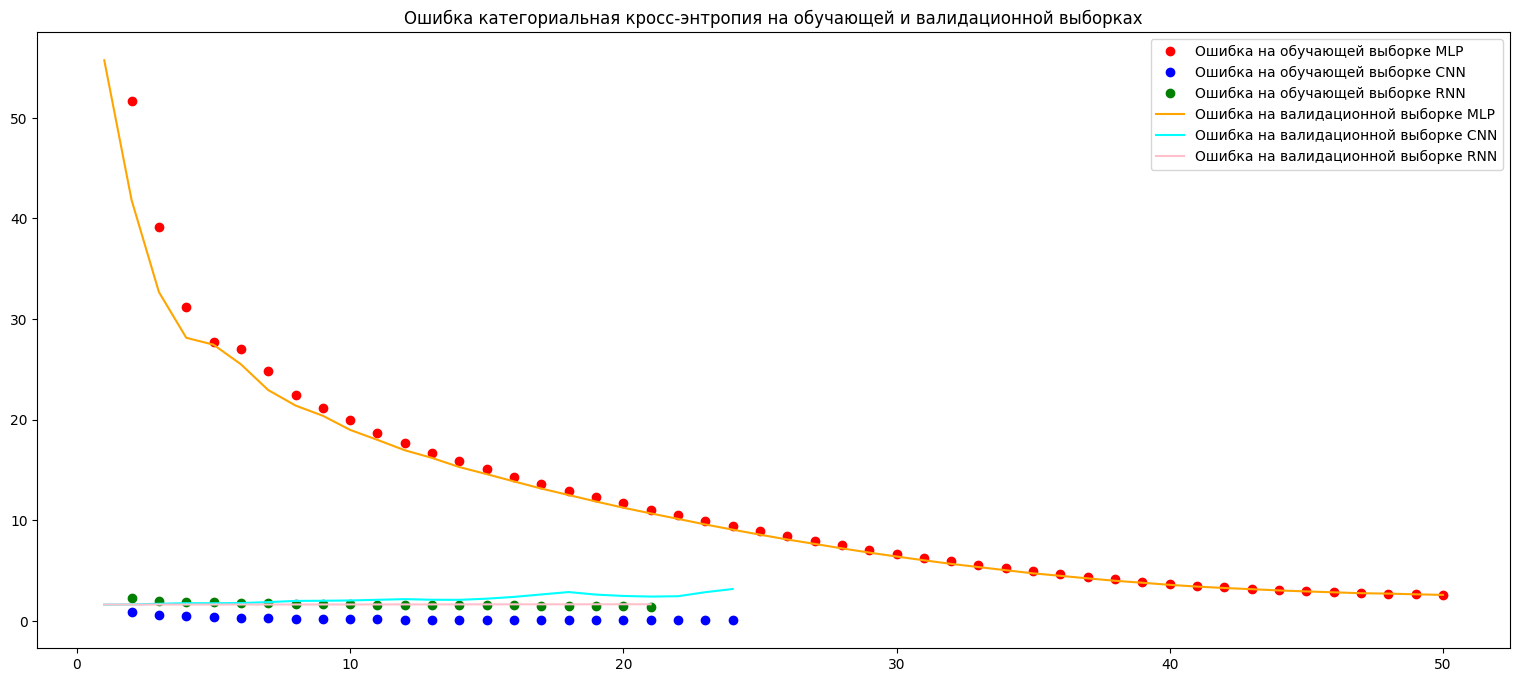

In [101]:
loss_01 = history_01.history["loss"]
loss_02 = history_02.history["loss"]
loss_03 = history_03.history["loss"]

val_loss_01 = history_01.history["val_loss"]
val_loss_02 = history_02.history["val_loss"]
val_loss_03 = history_03.history["val_loss"]

epochs_01 = range(1, len(loss_01) + 1)
epochs_02 = range(1, len(loss_02) + 1)
epochs_03 = range(1, len(loss_03) + 1)

plt.figure(figsize=(19, 8))
plt.plot(epochs_01[1:], loss_01[1:], "bo", color='red', label="Ошибка на обучающей выборке MLP")
plt.plot(epochs_02[1:], loss_02[1:], "bo", color='blue', label="Ошибка на обучающей выборке CNN")
plt.plot(epochs_03[1:], loss_03[1:], "bo", color='green', label="Ошибка на обучающей выборке RNN")

plt.plot(epochs_01, val_loss_01, "b", color='orange', label="Ошибка на валидационной выборке MLP")
plt.plot(epochs_02, val_loss_02, "b", color='cyan', label="Ошибка на валидационной выборке CNN")
plt.plot(epochs_03, val_loss_03, "b", color='pink', label="Ошибка на валидационной выборке RNN")

plt.title("Ошибка категориальная кросс-энтропия на обучающей и валидационной выборках")
plt.legend()
plt.show()

## 6. Visualize the learning curves of the three constructed models for the percentage of correct answers on the validation set in one figure depending on the training epoch, labeling the axes and the figure and creating a legend.

C:\Users\Mo\AppData\Local\Temp\ipykernel_18360\4070226802.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_01[1:], acc_01[1:], "bo", color='red', label="accuracy на обучающей выборке MLP")
C:\Users\Mo\AppData\Local\Temp\ipykernel_18360\4070226802.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_02[1:], acc_02[1:], "bo", color='blue', label="accuracy на обучающей выборке CNN")
C:\Users\Mo\AppData\Local\Temp\ipykernel_18360\4070226802.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_03[1:], acc_03[1:], "bo", color='green', label="accuracy на обучающей выборке RNN")
C:\Users\Mo\AppData\Local\Temp\

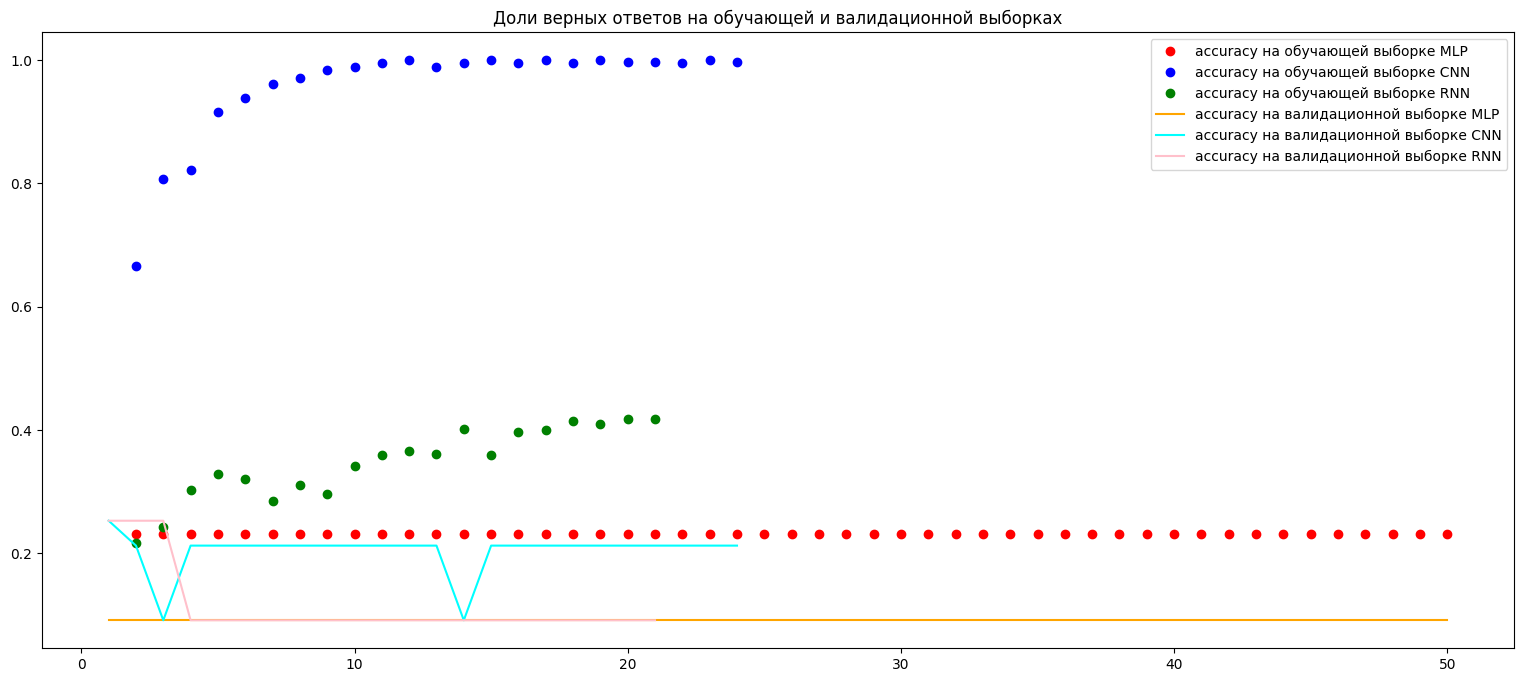

In [102]:
acc_01 = history_01.history["accuracy"]
acc_02 = history_02.history["accuracy"]
acc_03 = history_03.history["accuracy"]

val_acc_01 = history_01.history["val_accuracy"]
val_acc_02 = history_02.history["val_accuracy"]
val_acc_03 = history_03.history["val_accuracy"]

epochs_01 = range(1, len(acc_01) + 1)
epochs_02 = range(1, len(acc_02) + 1)
epochs_03 = range(1, len(acc_03) + 1)

plt.figure(figsize=(19, 8))
plt.plot(epochs_01[1:], acc_01[1:], "bo", color='red', label="accuracy на обучающей выборке MLP")
plt.plot(epochs_02[1:], acc_02[1:], "bo", color='blue', label="accuracy на обучающей выборке CNN")
plt.plot(epochs_03[1:], acc_03[1:], "bo", color='green', label="accuracy на обучающей выборке RNN")

plt.plot(epochs_01, val_acc_01, "b", color='orange', label="accuracy на валидационной выборке MLP")
plt.plot(epochs_02, val_acc_02, "b", color='cyan', label="accuracy на валидационной выборке CNN")
plt.plot(epochs_03, val_acc_03, "b", color='pink', label="accuracy на валидационной выборке RNN")

plt.title("Доли верных ответов на обучающей и валидационной выборках")
plt.legend()
plt.show()

## 7. Using the neural network model with the best percentage of correct answers on the test set, determine for each of the classes two images in the test set that have a minimum and maximum probability of being classified into the correct class, and visualize these images.

In [129]:
#For CNN model
min_indices = np.argmin(pred_02, axis=0)
max_indices = np.argmax(pred_02, axis=0)
print(min_indices, max_indices)

"""
min_indices_03 = np.argmin(pred_03, axis=0)
max_indices_03 = np.argmax(pred_03, axis=0)
print(min_indices_03, max_indices_03)
"""

[386 357 131  59  13] [ 48 192 205 393 148]


'\nmin_indices_03 = np.argmin(pred_03, axis=0)\nmax_indices_03 = np.argmax(pred_03, axis=0)\nprint(min_indices_03, max_indices_03)\n'

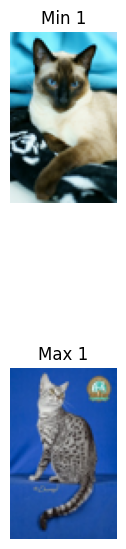

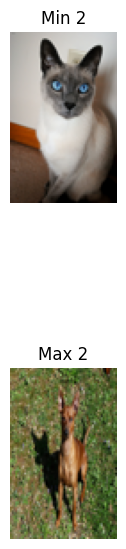

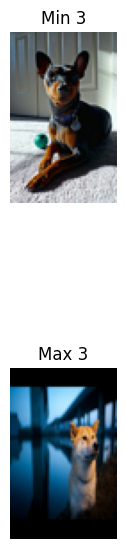

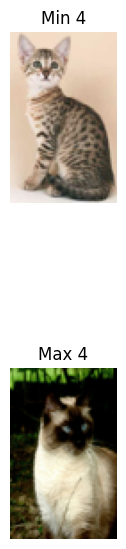

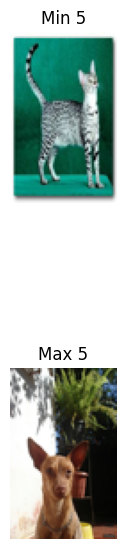

In [124]:
for i in range(len(min_indices)):
    plt.figure(figsize=(8, 8))
    
    # Display min image
    plt.subplot(2, 5, i+1)
    plt.imshow(df_test_01.iloc[min_indices[i]]['image'])
    plt.title(f'Min {i+1}')
    plt.axis('off')
    
    # Display max image
    plt.subplot(2, 5, i+6)
    plt.imshow(df_test_01.iloc[max_indices[i]]['image'])
    plt.title(f'Max {i+1}')
    plt.axis('off')
